# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks 
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [2]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [3]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [4]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
393,4,116,72,12,87,22.1,0.463,37,0
223,7,142,60,33,190,28.8,0.687,61,0
602,1,124,74,36,0,27.8,0.100,30,0
384,1,125,70,24,110,24.3,0.221,25,0
295,6,151,62,31,120,35.5,0.692,28,0


In [5]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [6]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [8]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes. 
Use the sequential model with single layer network and input shape to 8. 



Normalize the data

In [9]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation 
* Final layer with one node and sigmoid activation (standard for binary classification)

In [10]:

model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary 

In [11]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


Train the model 
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history. 


In [12]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200


c:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


18/18 [==============================] - 2s 8ms/step - loss: 0.6164 - accuracy: 0.6910 - val_loss: 0.6470 - val_accuracy: 0.6562
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.6997 - val_loss: 0.6416 - val_accuracy: 0.6615
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.6997 - val_loss: 0.6364 - val_accuracy: 0.6667
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.7049 - val_loss: 0.6316 - val_accuracy: 0.6667
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5977 - accuracy: 0.7014 - val_loss: 0.6270 - val_accuracy: 0.6719
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5936 - accuracy: 0.7014 - val_loss: 0.6227 - val_accuracy: 0.6823
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.7083 - val_loss: 0.6187 - val_accuracy: 0.6823
Epoch 8/200
18/18 [======

In [28]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model.predict(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 998us/step


In [29]:
y_pred_class_nn_1[:10]

array([[0.49188495],
       [0.5042432 ],
       [0.38750106],
       [0.4005675 ],
       [0.16661055],
       [0.53496736],
       [0.03907938],
       [0.36321503],
       [0.87953526],
       [0.28890422]], dtype=float32)

In [30]:
y_pred_prob_nn_1[:10]

array([[0.49188495],
       [0.5042432 ],
       [0.38750106],
       [0.4005675 ],
       [0.16661055],
       [0.53496736],
       [0.03907938],
       [0.36321503],
       [0.87953526],
       [0.28890422]], dtype=float32)

Create the plot_roc function

In [26]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.750
roc-auc is 0.810


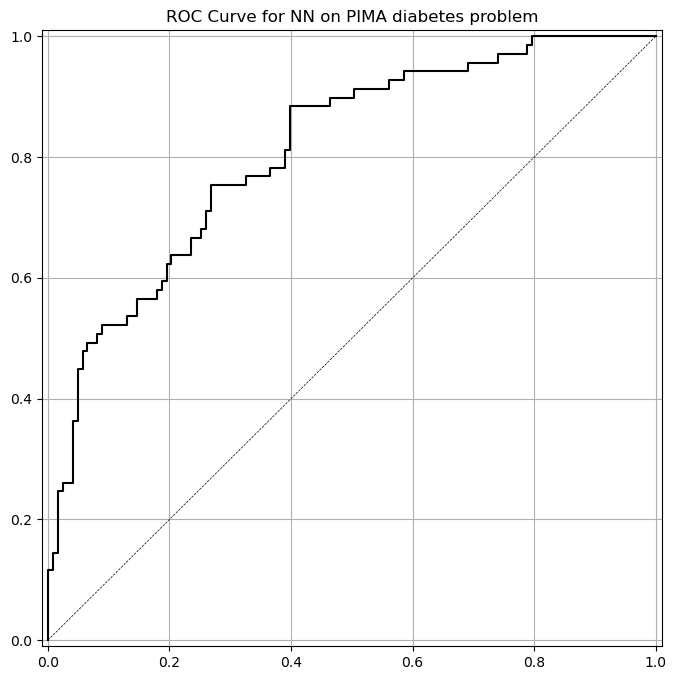

In [33]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,np.round(y_pred_class_nn_1))))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [34]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

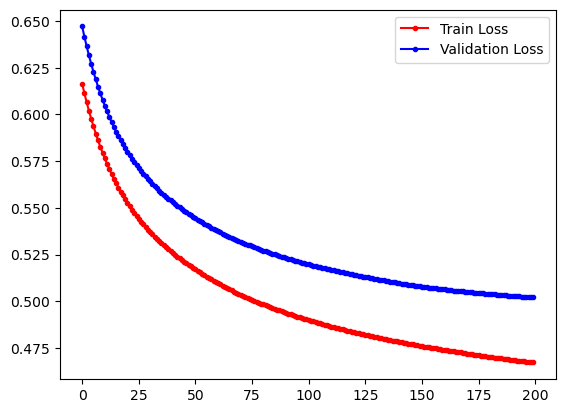

In [35]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

#type your answer here

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures. 
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

#### Conclusion

#type your answer here